# Percentage Volume Oscillator (PVO)

https://chartschool.stockcharts.com/table-of-contents/technical-indicators-and-overlays/technical-indicators/percentage-volume-oscillator-pvo

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)
df.index = pd.Index(df.index.date, name="Date")

# View Columns
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.615883,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.608807,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.797443,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.261929,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.108681,82271200


In [3]:
# Calculate 12-day and 26-day EMAs of volume
df['12-day EMA Volume'] = df['Volume'].ewm(span=12, adjust=False).mean()
df['26-day EMA Volume'] = df['Volume'].ewm(span=26, adjust=False).mean()

# Calculate PVO
df['PVO'] = ((df['12-day EMA Volume'] - df['26-day EMA Volume']) / df['26-day EMA Volume']) * 100

# Calculate Signal Line (9-day EMA of PVO)
df['Signal Line'] = df['PVO'].ewm(span=9, adjust=False).mean()

# Calculate PVO Histogram
df['PVO Histogram'] = df['PVO'] - df['Signal Line']
    

In [4]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,12-day EMA Volume,26-day EMA Volume,PVO,Signal Line,PVO Histogram
Date,,,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.615883,102223600,1.022236e+08,1.022236e+08,0.000000,0.000000,0.000000
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.608807,118071600,1.046618e+08,1.033975e+08,1.222687,0.244537,0.978149
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.797443,89738400,1.023659e+08,1.023857e+08,-0.019422,0.191745,-0.211168
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.261929,94640000,1.011773e+08,1.018120e+08,-0.623424,0.028712,-0.652135
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.108681,82271200,9.826864e+07,1.003645e+08,-2.088267,-0.394684,-1.693583


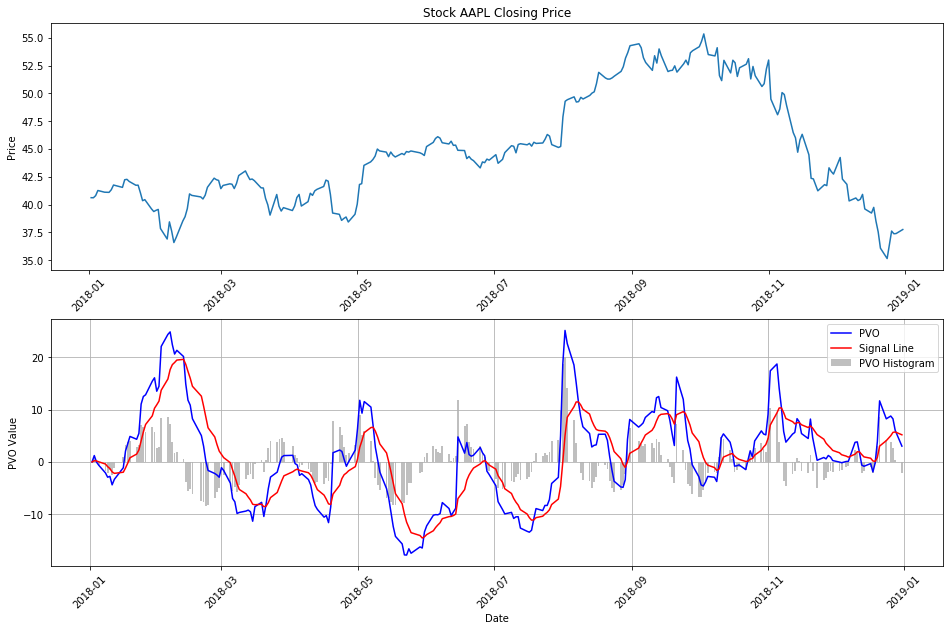

In [5]:
# Create the figure and subplots
fig = plt.figure(figsize=(16, 10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock ' + symbol + ' Closing Price')
ax1.set_ylabel('Price')
ax1.tick_params(axis='x', rotation=45)

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['PVO'], label='PVO', color='blue')
ax2.plot(df['Signal Line'], label='Signal Line', color='red')
ax2.bar(df.index, df['PVO Histogram'], label='PVO Histogram', color='grey', alpha=0.5)
ax2.grid()
ax2.set_ylabel('PVO Value')
ax2.set_xlabel('Date')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(loc='best')

plt.show()

## Candlestick with PVO

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,12-day EMA Volume,26-day EMA Volume,PVO,Signal Line,PVO Histogram,VolumePositive
0,736696.0,42.540001,43.075001,42.314999,43.064999,40.615883,102223600,1.022236e+08,1.022236e+08,0.000000,0.000000,0.000000,False
1,736697.0,43.132500,43.637501,42.990002,43.057499,40.608807,118071600,1.046618e+08,1.033975e+08,1.222687,0.244537,0.978149,False
2,736698.0,43.134998,43.367500,43.020000,43.257500,40.797443,89738400,1.023659e+08,1.023857e+08,-0.019422,0.191745,-0.211168,False
3,736699.0,43.360001,43.842499,43.262501,43.750000,41.261929,94640000,1.011773e+08,1.018120e+08,-0.623424,0.028712,-0.652135,False
4,736702.0,43.587502,43.902500,43.482498,43.587502,41.108681,82271200,9.826864e+07,1.003645e+08,-2.088267,-0.394684,-1.693583,False


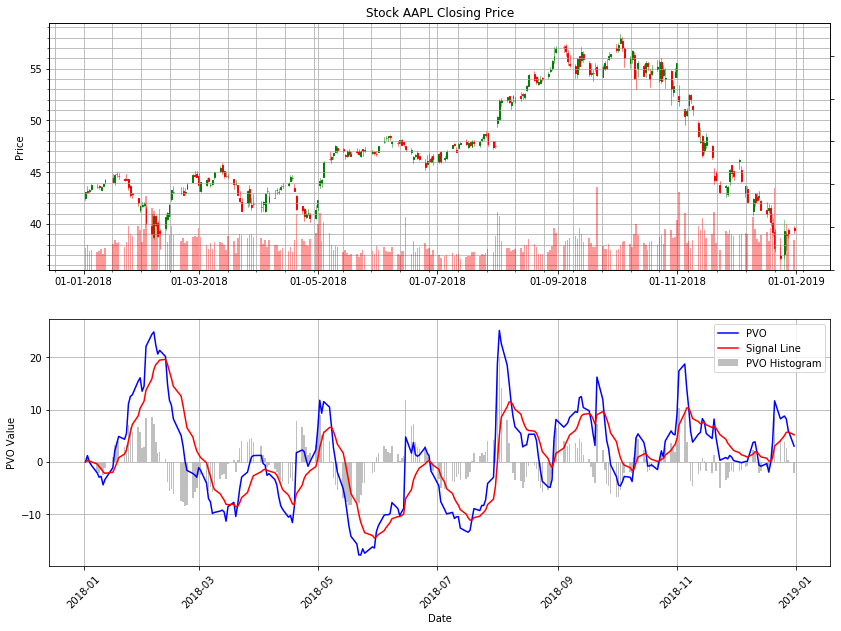

In [7]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['PVO'], label='PVO', color='blue')
ax2.plot(df['Signal Line'], label='Signal Line', color='red')
ax2.bar(df.index, df['PVO Histogram'], label='PVO Histogram', color='grey', alpha=0.5)
ax2.grid()
ax2.set_ylabel('PVO Value')
ax2.set_xlabel('Date')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(loc='best')